In [1]:

import pandas as pd
import numpy as np
import collections

taylor_swift = pd.read_csv("01-taylor_swift.csv")
fearless = pd.read_csv("02-fearless_taylors_version.csv")
speak_now = pd.read_csv("03-speak_now_deluxe_package.csv")
red = pd.read_csv("04-red_deluxe_edition.csv")
album_1989 = pd.read_csv("05-1989_deluxe.csv")
reputation = pd.read_csv("06-reputation.csv")
lover = pd.read_csv("07-lover.csv")
folklore = pd.read_csv("08-folklore_deluxe_version.csv")
evermore = pd.read_csv("09-evermore_deluxe_version.csv")

album_info = [taylor_swift, fearless, speak_now, red, album_1989, reputation, lover, folklore, evermore]
albums_df = pd.concat(album_info)

albums_df.columns

Index(['album_name', 'track_title', 'track_n', 'lyric', 'line'], dtype='object')

In [2]:

albums_df['lyric'] = albums_df['lyric'].apply(lambda x: x.lower())\
    .replace(',', '', regex = True)\
    .replace('"', '', regex = True)\
    .replace('\.', '', regex = True)\
    .replace('\?', '', regex = True)\
    .replace('\(', '', regex = True)\
    .replace('\)', '', regex = True) 

lyrics_columns = ['album_name', 'track_title', 'track_n'] 

lyrics = albums_df.sort_values(lyrics_columns)\
    .groupby(lyrics_columns).lyric\
    .apply(' '.join)\
    .reset_index(name='lyric')
    
lyrics = lyrics.sort_values(by = ['album_name','track_n']) 
    


In [3]:


#display(albums_df)
#display(lyrics)
#lyrics.to_csv(r'C:\Users\Alisha\Desktop\Taylor Swift Project\fulllyrics.csv', index=False, encoding='utf-8-sig') 


time mcgraw stuff because it is my favorite song

<function matplotlib.pyplot.show(close=None, block=None)>

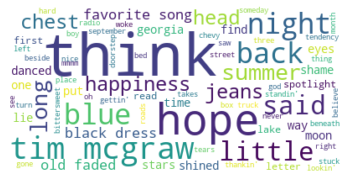

In [4]:
from os  import path
#from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


tim_mcgraw = lyrics.loc[lyrics['track_title']=='Tim McGraw', 'lyric'].item()  

tm_wc = WordCloud(background_color='white', max_font_size=70) 
tm_wc.generate(tim_mcgraw)

#Plotting
plt.imshow(tm_wc, interpolation = 'bilinear')  
plt.axis('off')
plt.show

In [5]:
album_names =lyrics['album_name'].unique()
print(album_names)

['1989 (Deluxe)' 'Fearless (Taylor’s Version)' 'Lover'
 'Red (Deluxe Edition)' 'Speak Now (Deluxe)' 'Taylor Swift'
 'evermore (deluxe version)' 'folklore (deluxe version)' 'reputation']


for albums:


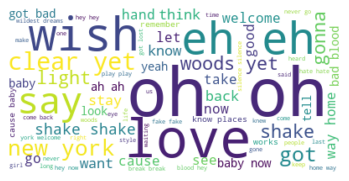

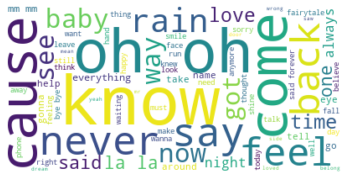

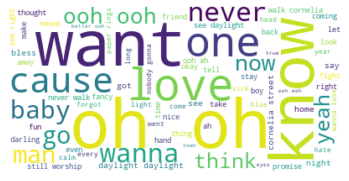

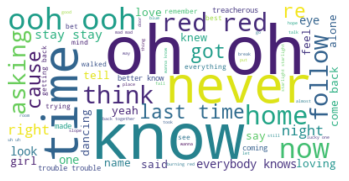

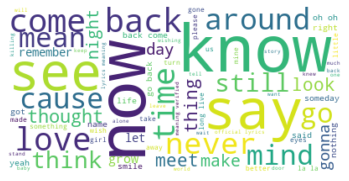

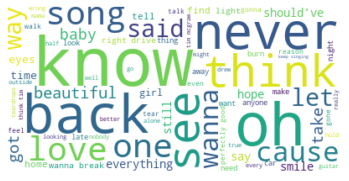

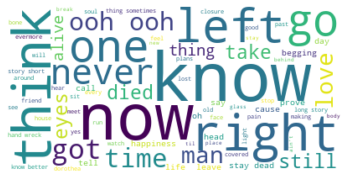

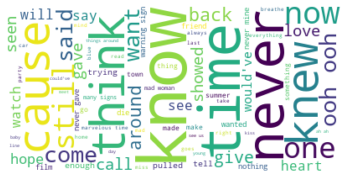

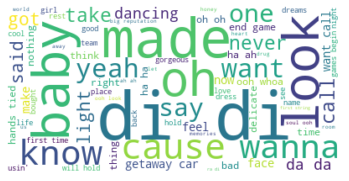

<Figure size 432x288 with 0 Axes>

In [10]:

for album_name in album_names:
    tracks=lyrics.loc[lyrics['album_name']==album_name,'track_n']
    album_words = '' 
    
    for j in tracks:
        track_words = lyrics.loc[((lyrics['track_n']==j) & (lyrics['album_name']==album_name)) , 'lyric'].item()  
        album_words += track_words
    
    
    wc = WordCloud(background_color='white', max_font_size=80,max_words=75) 
    wc.generate(album_words)

    #Plotting
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.axis('off')
    plt.show()
    plt.clf()
 

summary statistics

first remove stop words

In [17]:
#from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def remove_stopwords(word_lists):
    new_list = []
    
    for i in word_lists:
        list_without_sw = [word for word in i if not word in stopwords.words()]
        new_list.append(list_without_sw)
    
    return new_list

word_lists = []

for album_name in album_names:
    tracks=lyrics.loc[lyrics['album_name']==album_name,'track_n']
    album_words = '' 
    
    for j in tracks:
        track_words = lyrics.loc[((lyrics['track_n']==j) & (lyrics['album_name']==album_name)) , 'lyric'].item()  
        album_words += track_words
    
    word_lists.append(album_words.split())
    
word_lists_wo_sw = remove_stopwords(word_lists)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alisha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1989 (Deluxe)'),
  Text(1, 0, 'Fearless (Taylor’s Version)'),
  Text(2, 0, 'Lover'),
  Text(3, 0, 'Red (Deluxe Edition)'),
  Text(4, 0, 'Speak Now (Deluxe)'),
  Text(5, 0, 'Taylor Swift'),
  Text(6, 0, 'evermore (deluxe version)'),
  Text(7, 0, 'folklore (deluxe version)'),
  Text(8, 0, 'reputation')])

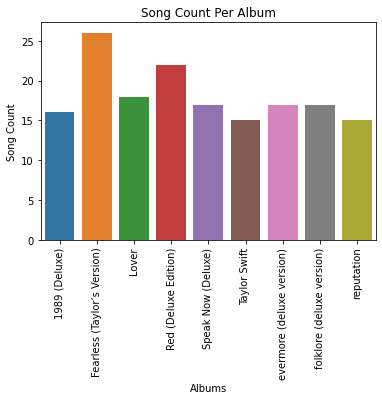

In [39]:
import seaborn as sns

song_count=sns.countplot(data=lyrics, x='album_name').set_title('Song Count Per Album')
plt.xlabel('Albums')
plt.ylabel('Song Count') 
plt.xticks(rotation=90)
